In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:
df = pd.read_csv('march2021delivery.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,FWD_PACKAGE_KEY,MERCHANT_ORG_KEY,ORG_NAME,INDUCTION_SCAN_DATE_KEY,DELIVERY_DATE_KEY,LENGTH,WIDTH,HEIGHT,DIMENSIONAL_WEIGHT,AUT_DIM_PCF,AUT_DIM_LENGTH,AUT_DIM_WIDTH,AUT_DIM_HEIGHT,BILL_WEIGHT,ACTUAL_WEIGHT
0,0,0,678819949,3558,Publishers Clearing House,20210306.0,20210309,12.0,10.0,5.0,NaN,4.369730,11.8504,9.9606,4.8819,2.0000,1.4572
1,1,1,678843892,3558,Publishers Clearing House,20210306.0,20210309,20.0,11.0,6.0,NaN,2.511380,19.8819,10.8661,5.5118,2.0000,1.7306
2,2,2,678792589,3417,Alibaba / Hangzhou Cai Niao,20210306.0,20210309,12.0,11.0,2.0,NaN,1.528493,11.7323,11.1811,1.6142,0.1875,0.1873
3,3,3,678709966,3558,Publishers Clearing House,20210306.0,20210309,0.0,0.0,0.0,NaN,4.959341,9.4095,4.7244,4.8032,0.6250,0.6128
4,4,4,678772000,3171,Bath and Body Works,20210306.0,20210309,12.0,9.0,5.0,NaN,8.651243,11.9291,4.9213,8.5433,3.0000,2.5110


In [3]:
df = df.drop('Unnamed: 0', axis = 1)

In [4]:
df = df.drop('Unnamed: 0.1', axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250674 entries, 0 to 8250673
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FWD_PACKAGE_KEY          int64  
 1   MERCHANT_ORG_KEY         int64  
 2   ORG_NAME                 object 
 3   INDUCTION_SCAN_DATE_KEY  float64
 4   DELIVERY_DATE_KEY        int64  
 5   LENGTH                   float64
 6   WIDTH                    float64
 7   HEIGHT                   float64
 8   DIMENSIONAL_WEIGHT       float64
 9   AUT_DIM_PCF              float64
 10  AUT_DIM_LENGTH           float64
 11  AUT_DIM_WIDTH            float64
 12  AUT_DIM_HEIGHT           float64
 13  BILL_WEIGHT              float64
 14  ACTUAL_WEIGHT            float64
dtypes: float64(11), int64(3), object(1)
memory usage: 944.2+ MB


In [6]:
df.head()

,FWD_PACKAGE_KEY,MERCHANT_ORG_KEY,ORG_NAME,INDUCTION_SCAN_DATE_KEY,DELIVERY_DATE_KEY,LENGTH,WIDTH,HEIGHT,DIMENSIONAL_WEIGHT,AUT_DIM_PCF,AUT_DIM_LENGTH,AUT_DIM_WIDTH,AUT_DIM_HEIGHT,BILL_WEIGHT,ACTUAL_WEIGHT
0,678819949,3558,Publishers Clearing House,20210306.0,20210309,12.0,10.0,5.0,NaN,4.369730,11.8504,9.9606,4.8819,2.0000,1.4572
1,678843892,3558,Publishers Clearing House,20210306.0,20210309,20.0,11.0,6.0,NaN,2.511380,19.8819,10.8661,5.5118,2.0000,1.7306
2,678792589,3417,Alibaba / Hangzhou Cai Niao,20210306.0,20210309,12.0,11.0,2.0,NaN,1.528493,11.7323,11.1811,1.6142,0.1875,0.1873
3,678709966,3558,Publishers Clearing House,20210306.0,20210309,0.0,0.0,0.0,NaN,4.959341,9.4095,4.7244,4.8032,0.6250,0.6128
4,678772000,3171,Bath and Body Works,20210306.0,20210309,12.0,9.0,5.0,NaN,8.651243,11.9291,4.9213,8.5433,3.0000,2.5110


### Sort df by company

In [7]:
BY_ORG = df.sort_values('ORG_NAME')
BY_ORG.head()

,FWD_PACKAGE_KEY,MERCHANT_ORG_KEY,ORG_NAME,INDUCTION_SCAN_DATE_KEY,DELIVERY_DATE_KEY,LENGTH,WIDTH,HEIGHT,DIMENSIONAL_WEIGHT,AUT_DIM_PCF,AUT_DIM_LENGTH,AUT_DIM_WIDTH,AUT_DIM_HEIGHT,BILL_WEIGHT,ACTUAL_WEIGHT
4844634,659587368,3604,1ClickPrint,20210112.0,20210319,16.0,16.0,1.0,NaN,6.074572,16.2205,16.2205,1.1417,2.0,1.056
2418372,645811078,3604,1ClickPrint,20201214.0,20210312,9.0,9.0,9.0,NaN,11.642950,9.1339,8.6221,8.9764,4.0,3.739
1763582,680102821,3542,3PL Logistics Inc_2,20210309.0,20210310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.790
6690701,680100661,3542,3PL Logistics Inc_2,20210309.0,20210323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,28.645
5425194,680104015,3542,3PL Logistics Inc_2,20210309.0,20210319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,33.575


In [8]:
BY_ORG.nunique()

FWD_PACKAGE_KEY            8250674
MERCHANT_ORG_KEY               186
ORG_NAME                       187
INDUCTION_SCAN_DATE_KEY        131
DELIVERY_DATE_KEY              120
LENGTH                         123
WIDTH                           52
HEIGHT                          24
DIMENSIONAL_WEIGHT            2981
AUT_DIM_PCF                6018916
AUT_DIM_LENGTH                1170
AUT_DIM_WIDTH                  668
AUT_DIM_HEIGHT                 558
BILL_WEIGHT                     88
ACTUAL_WEIGHT                22906
dtype: int64

#### Determine null + zero counts overall
##### Results:
##### Manual has 1,653,912 null entries and 1,456,221 zero entries, yielding 3,110,133 unusable rows
##### Auto has 1,799,002 null entries and no zero entries, yielding 1,799,002 unusable rows
##### HOWEVER, ONLY 90 PACKAGES ARE MISSING A WEIGHT (and therefore a bill_weight) --> 23 companies in total are missing at least one weight --> LGA Mail Solutions accounts for a third of them, NGSTest and XPDEL each account for a sixth, the rest are one-off errors

In [9]:
count_null_manual = BY_ORG['LENGTH'].isna().sum()
print(count_null_manual)

1653912


In [11]:
# 1456221 rows

BY_ORG[BY_ORG['LENGTH'] == 0]

,FWD_PACKAGE_KEY,MERCHANT_ORG_KEY,ORG_NAME,INDUCTION_SCAN_DATE_KEY,DELIVERY_DATE_KEY,LENGTH,WIDTH,HEIGHT,DIMENSIONAL_WEIGHT,AUT_DIM_PCF,AUT_DIM_LENGTH,AUT_DIM_WIDTH,AUT_DIM_HEIGHT,BILL_WEIGHT,ACTUAL_WEIGHT
1550936,670364860,3586,4PX Express API,20210209.0,20210311,0.0,0.0,0.0,NaN,8.756940,9.6457,5.9055,9.6457,3.0000,2.7844
934731,677187048,3586,4PX Express API,20210302.0,20210309,0.0,0.0,0.0,NaN,10.092514,17.2835,2.7953,15.0787,4.0000,3.3400
1100102,677189700,3586,4PX Express API,20210302.0,20210308,0.0,0.0,0.0,NaN,8.438350,17.7559,3.2677,5.6299,2.0000,1.2522
239343,677180801,3586,4PX Express API,20210302.0,20210309,0.0,0.0,0.0,NaN,9.179065,16.8110,3.4252,5.1969,2.0000,1.2478
1100056,677188642,3586,4PX Express API,20210302.0,20210308,0.0,0.0,0.0,NaN,56.747263,14.0158,1.0630,2.7953,2.0000,1.0736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341094,677070795,3578,eShipper,20210302.0,20210306,0.0,0.0,0.0,NaN,13.833294,14.3701,1.4173,11.2992,2.0000,1.4462
5966965,682821358,3578,eShipper,20210317.0,20210325,0.0,0.0,0.0,NaN,3.255277,17.2047,5.9055,14.2913,3.0000,2.1473
1587670,679051857,3578,eShipper,20210308.0,20210313,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.1875,0.1521
4003250,677323450,3578,eShipper,20210303.0,20210315,0.0,0.0,0.0,NaN,15.385417,8.4646,2.4016,6.2992,0.9375,0.8950


In [12]:
count_zero_manual = 1456221
print(count_zero_manual)

1456221


In [13]:
total_empty_manual = count_null_manual + count_zero_manual
print('Total unusable count for manual', total_empty_manual)

Total unusable count for manual 3110133


In [10]:
count_null_auto = BY_ORG['AUT_DIM_LENGTH'].isna().sum()
print(count_null_auto)

1799002


In [14]:
# 0 rows

BY_ORG[BY_ORG['AUT_DIM_LENGTH'] == 0]

,FWD_PACKAGE_KEY,MERCHANT_ORG_KEY,ORG_NAME,INDUCTION_SCAN_DATE_KEY,DELIVERY_DATE_KEY,LENGTH,WIDTH,HEIGHT,DIMENSIONAL_WEIGHT,AUT_DIM_PCF,AUT_DIM_LENGTH,AUT_DIM_WIDTH,AUT_DIM_HEIGHT,BILL_WEIGHT,ACTUAL_WEIGHT


In [16]:
total_empty_auto = count_null_auto
print('Total unusable count for auto', total_empty_auto)

Total unusable count for auto 1799002


In [17]:
count_null_weight = BY_ORG['ACTUAL_WEIGHT'].isna().sum()
print(count_null_weight)

90


In [19]:
count_null_weight = BY_ORG['BILL_WEIGHT'].isna().sum()
print(count_null_weight)

90


In [22]:
no_weight_df = BY_ORG[BY_ORG['ACTUAL_WEIGHT'].isna()]
no_weight_df.head()

,FWD_PACKAGE_KEY,MERCHANT_ORG_KEY,ORG_NAME,INDUCTION_SCAN_DATE_KEY,DELIVERY_DATE_KEY,LENGTH,WIDTH,HEIGHT,DIMENSIONAL_WEIGHT,AUT_DIM_PCF,AUT_DIM_LENGTH,AUT_DIM_WIDTH,AUT_DIM_HEIGHT,BILL_WEIGHT,ACTUAL_WEIGHT
2655617,690510082,3517,Air City - China,20210222.0,20210311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882027,690396173,3368,BEI JING YANWEN LOGISTICS CO. LTD Shanghai Br...,20210220.0,20210310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3158301,690396673,3368,BEI JING YANWEN LOGISTICS CO. LTD Shanghai Br...,20210220.0,20210317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5797559,690395915,3368,BEI JING YANWEN LOGISTICS CO. LTD Shanghai Br...,20210218.0,20210322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3616061,690396093,3368,BEI JING YANWEN LOGISTICS CO. LTD Shanghai Br...,20210220.0,20210318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
no_weight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 2655617 to 8224809
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FWD_PACKAGE_KEY          90 non-null     int64  
 1   MERCHANT_ORG_KEY         90 non-null     int64  
 2   ORG_NAME                 90 non-null     object 
 3   INDUCTION_SCAN_DATE_KEY  90 non-null     float64
 4   DELIVERY_DATE_KEY        90 non-null     int64  
 5   LENGTH                   0 non-null      float64
 6   WIDTH                    0 non-null      float64
 7   HEIGHT                   0 non-null      float64
 8   DIMENSIONAL_WEIGHT       0 non-null      float64
 9   AUT_DIM_PCF              0 non-null      float64
 10  AUT_DIM_LENGTH           25 non-null     float64
 11  AUT_DIM_WIDTH            25 non-null     float64
 12  AUT_DIM_HEIGHT           25 non-null     float64
 13  BILL_WEIGHT              0 non-null      float64
 14  ACTUAL_WEIGHT    

In [25]:
no_weight_df.nunique()

FWD_PACKAGE_KEY            90
MERCHANT_ORG_KEY           23
ORG_NAME                   23
INDUCTION_SCAN_DATE_KEY    16
DELIVERY_DATE_KEY          20
LENGTH                      0
WIDTH                       0
HEIGHT                      0
DIMENSIONAL_WEIGHT          0
AUT_DIM_PCF                 0
AUT_DIM_LENGTH             25
AUT_DIM_WIDTH              20
AUT_DIM_HEIGHT             24
BILL_WEIGHT                 0
ACTUAL_WEIGHT               0
dtype: int64

In [27]:
no_weight_companies = no_weight_df.groupby(by = 'ORG_NAME').count().sort_values(by = 'FWD_PACKAGE_KEY')
no_weight_companies

,FWD_PACKAGE_KEY,MERCHANT_ORG_KEY,INDUCTION_SCAN_DATE_KEY,DELIVERY_DATE_KEY,LENGTH,WIDTH,HEIGHT,DIMENSIONAL_WEIGHT,AUT_DIM_PCF,AUT_DIM_LENGTH,AUT_DIM_WIDTH,AUT_DIM_HEIGHT,BILL_WEIGHT,ACTUAL_WEIGHT
ORG_NAME,,,,,,,,,,,,,,
Air City - China,1,1,1,1,0,0,0,0,0,0,0,0,0,0
Victoria Secret,1,1,1,1,0,0,0,0,0,0,0,0,0,0
TechStyle - Fabletics,1,1,1,1,0,0,0,0,0,1,1,1,0,0
Starcrest,1,1,1,1,0,0,0,0,0,0,0,0,0,0
Shipmonk,1,1,1,1,0,0,0,0,0,0,0,0,0,0
Kohls Maryland,1,1,1,1,0,0,0,0,0,0,0,0,0,0
Worldnet Direct - Nasty Gal,1,1,1,1,0,0,0,0,0,0,0,0,0,0
Kable Products (used for PB API),1,1,1,1,0,0,0,0,0,1,1,1,0,0
IBC,1,1,1,1,0,0,0,0,0,1,1,1,0,0


#### Org count info:
##### Largest five companies by package quantity: Publishers Clearing House, Alibaba / Hangzhou Cai Niao, Full Beauty Deliveries, YDH, and Victoria Secret	
##### In this timeframe, 12 companies only sent one package, 3 only sent two, etc... --> 62 companies (1/3 overall) sent fewer than 50 packages

In [45]:
BY_ORG_grouped = BY_ORG.groupby(by = 'ORG_NAME').count().sort_values(by = 'FWD_PACKAGE_KEY')

In [48]:
BY_ORG_grouped = BY_ORG_grouped.reset_index()

In [49]:
BY_ORG_grouped.head()

,ORG_NAME,FWD_PACKAGE_KEY,MERCHANT_ORG_KEY,INDUCTION_SCAN_DATE_KEY,DELIVERY_DATE_KEY,LENGTH,WIDTH,HEIGHT,DIMENSIONAL_WEIGHT,AUT_DIM_PCF,AUT_DIM_LENGTH,AUT_DIM_WIDTH,AUT_DIM_HEIGHT,BILL_WEIGHT,ACTUAL_WEIGHT
0,IBC,1,1,1,1,0,0,0,0,0,1,1,1,0,0
1,Asendia - Fat Quarter,1,1,1,1,0,0,0,0,1,1,1,1,1,1
2,Ascena - Lane Bryant,1,1,1,1,0,0,0,0,0,0,0,0,1,1
3,Qualtry,1,1,1,1,0,0,0,0,0,0,0,0,1,1
4,Worldnet Direct - Nasty Gal,1,1,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
BY_ORG_grouped.iloc[60:70]

In [ ]:
BY_ORG_grouped.tail()

#### Code to create dataframe with information on null values in the manual and auto dimmension fields
##### Note: do not run unless data changes, is saved in csv: MarchNullInfo.csv

In [ ]:
# loop through df, count number of null values in each field and output new dataframe with info by company

dfNULLS = pd.DataFrame(columns = ['ORG_NAME', 'COUNT', 'BOTH_NULL_COUNT', 'MANUAL_NULL_COUNT', 'AUTO_NULL_COUNT', 'BOTH_NULL_PER', 'MANUAL_NULL_PER', 'AUTO_NULL_PER'])
ORG_NAME = list(BY_ORG['ORG_NAME'].unique())

orgs = 1

for org in ORG_NAME:
        
    count = 0
    manualNULL_autoNONNULL = 0
    autoNULL_manualNONNULL = 0
    bothNULL = 0
    
    print(orgs, org)
    
    by_org = BY_ORG[BY_ORG['ORG_NAME'] == org]
    
    if org != 'Publishers Clearing House':
        
    
        for row in by_org.T.iteritems():
            if pd.isnull( by_org.iat[count, 5] ):
                if pd.notnull( by_org.iat[count, 10] ):
                    manualNULL_autoNONNULL += 1
                else:
                    bothNULL += 1
            elif pd.notnull( by_org.iat[count, 5] ):
                if pd.isnull( by_org.iat[count, 10] ):
                    autoNULL_manualNONNULL += 1
                else:
                    bothNULL += 1
            count += 1
    
        both_null_per = bothNULL / count
        manual_null_per = manualNULL_autoNONNULL / count
        auto_null_per = autoNULL_manualNONNULL / count
    
        data = {'ORG_NAME': org, 'COUNT': count, 'BOTH_NULL_COUNT': bothNULL, 'MANUAL_NULL_COUNT': manualNULL_autoNONNULL, 'AUTO_NULL_COUNT': autoNULL_manualNONNULL, 'BOTH_NULL_PER': both_null_per, 'MANUAL_NULL_PER': manual_null_per, 'AUTO_NULL_PER': auto_null_per}
        newRow = pd.Series(data, index = ['ORG_NAME', 'COUNT', 'BOTH_NULL_COUNT', 'MANUAL_NULL_COUNT', 'AUTO_NULL_COUNT', 'BOTH_NULL_PER', 'MANUAL_NULL_PER', 'AUTO_NULL_PER'])
    
        dfNULLS = dfNULLS.append(newRow, ignore_index = True)
    
    orgs = orgs + 1

In [ ]:
dfNULLS.head()

In [ ]:
dfNULLS.to_csv('MarchNULLInfo.csv')

#### Code to get null info on Publishers Clearing House (too large to include above, have not successfully run)

In [ ]:
PCH = BY_ORG[BY_ORG['ORG_NAME'] == 'Publishers Clearing House']
        
PCH

In [ ]:
# loop through df, count number of null values in each field, and output new dataframe for Publishers Clearing House


count = 0
manualNULL_autoNONNULL = 0
autoNULL_manualNONNULL = 0
bothNULL = 0

print('here')
            
for row in PCH.T.iteritems():
    print(count)
            
    if pd.isnull( PCH.iat[count, 5] ):
        if pd.notnull( PCH.iat[count, 10] ):
             manualNULL_autoNONNULL += 1
        else:
            bothNULL += 1
    elif pd.notnull( PCH.iat[count, 5] ):
        if pd.isnull( PCH.iat[count, 10] ):
            autoNULL_manualNONNULL += 1
        else:
            bothNULL += 1
    count += 1
    
both_null_per = bothNULL / count
manual_null_per = manualNULL_autoNONNULL / count
auto_null_per = autoNULL_manualNONNULL / count
    
data = {'ORG_NAME': org, 'COUNT': count, 'BOTH_NULL_COUNT': bothNULL, 'MANUAL_NULL_COUNT': manualNULL_autoNONNULL, 'AUTO_NULL_COUNT': autoNULL_manualNONNULL, 'BOTH_NULL_PER': both_null_per, 'MANUAL_NULL_PER': manual_null_per, 'AUTO_NULL_PER': auto_null_per}
newRow = pd.Series(data, index = ['ORG_NAME', 'COUNT', 'BOTH_NULL_COUNT', 'MANUAL_NULL_COUNT', 'AUTO_NULL_COUNT', 'BOTH_NULL_PER', 'MANUAL_NULL_PER', 'AUTO_NULL_PER'])
    
dfNULLS = dfNULLS.append(newRow, ignore_index = True)

#### Resume here
##### Analysis of aggregate null data excluding Publishers Clearing House
##### As expected, the companies missing the most data by count are the companies with the most packages
##### For top companies by volume: Alibaba has 78.3% both null, Full Beauty Deliveries has 93.6% both null, YDH has 67.7% both null, Victoria Secret has 78.2% both null

In [28]:
nullInfo = pd.read_csv('MarchNULLInfo.csv')

In [29]:
nullInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         186 non-null    int64  
 1   ORG_NAME           186 non-null    object 
 2   COUNT              186 non-null    int64  
 3   BOTH_NULL_COUNT    186 non-null    int64  
 4   MANUAL_NULL_COUNT  186 non-null    int64  
 5   AUTO_NULL_COUNT    186 non-null    int64  
 6   BOTH_NULL_PER      186 non-null    float64
 7   MANUAL_NULL_PER    186 non-null    float64
 8   AUTO_NULL_PER      186 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 13.2+ KB


In [30]:
nullInfo.head()

,Unnamed: 0,ORG_NAME,COUNT,BOTH_NULL_COUNT,MANUAL_NULL_COUNT,AUTO_NULL_COUNT,BOTH_NULL_PER,MANUAL_NULL_PER,AUTO_NULL_PER
0,0,1ClickPrint,2,2,0,0,1.000000,0.000000,0.000000
1,1,3PL Logistics Inc_2,28,19,7,2,0.678571,0.250000,0.071429
2,2,4PX Express API,15223,11675,2867,681,0.766932,0.188333,0.044735
3,3,4PX Express USA,3,1,2,0,0.333333,0.666667,0.000000
4,4,AIT Worldwide - AMI USA,941,876,2,63,0.930925,0.002125,0.066950


In [31]:
nullInfo = nullInfo.drop('Unnamed: 0', axis = 1)

In [32]:
nullInfo.head()

,ORG_NAME,COUNT,BOTH_NULL_COUNT,MANUAL_NULL_COUNT,AUTO_NULL_COUNT,BOTH_NULL_PER,MANUAL_NULL_PER,AUTO_NULL_PER
0,1ClickPrint,2,2,0,0,1.000000,0.000000,0.000000
1,3PL Logistics Inc_2,28,19,7,2,0.678571,0.250000,0.071429
2,4PX Express API,15223,11675,2867,681,0.766932,0.188333,0.044735
3,4PX Express USA,3,1,2,0,0.333333,0.666667,0.000000
4,AIT Worldwide - AMI USA,941,876,2,63,0.930925,0.002125,0.066950


In [33]:
nullInfo = nullInfo.sort_values('COUNT')

In [34]:
nullInfo

,ORG_NAME,COUNT,BOTH_NULL_COUNT,MANUAL_NULL_COUNT,AUTO_NULL_COUNT,BOTH_NULL_PER,MANUAL_NULL_PER,AUTO_NULL_PER
51,China Courier,1,0,1,0,0.000000,1.000000,0.000000
62,ECMS Express Inc,1,0,1,0,0.000000,1.000000,0.000000
26,Asendia - Fat Quarter,1,0,1,0,0.000000,1.000000,0.000000
176,Worldnet Direct - Nasty Gal,1,1,0,0,1.000000,0.000000,0.000000
169,VF Vans JTN eCom,1,1,0,0,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
38,Bark Box,273726,162849,0,110877,0.594934,0.000000,0.405066
170,Victoria Secret,286895,224243,11062,51590,0.781620,0.038558,0.179822
179,YDH,290847,196923,54073,39851,0.677067,0.185916,0.137017
66,Full Beauty Deliveries,411837,385484,22395,3958,0.936011,0.054378,0.009611


In [35]:
nullInfo.describe()

,COUNT,BOTH_NULL_COUNT,MANUAL_NULL_COUNT,AUTO_NULL_COUNT,BOTH_NULL_PER,MANUAL_NULL_PER,AUTO_NULL_PER
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,33421.650538,25376.091398,4051.795699,3993.763441,0.663282,0.177067,0.159651
std,88092.005596,69256.319677,12493.540575,15274.970493,0.277992,0.259249,0.221238
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,10.250000,0.250000,2.000000,0.476915,0.000064,0.009954
50%,1206.500000,649.500000,12.500000,57.000000,0.763286,0.077921,0.060419
75%,19902.750000,16055.250000,2062.500000,1170.250000,0.886971,0.198439,0.200000
max,835838.000000,654419.000000,100524.000000,110877.000000,1.000000,1.000000,1.000000


#### deleted the background work to find differences between manual and auto info but have output csv
#####

In [59]:
differences_df = pd.read_csv('March_manual_auto_differences.csv')

In [60]:
differences_df.head()

,Unnamed: 0,FWD_PACKAGE_KEY,MERCHANT_ORG_KEY,ORG_NAME,INDUCTION_SCAN_DATE_KEY,DELIVERY_DATE_KEY,LENGTH,WIDTH,HEIGHT,DIMENSIONAL_WEIGHT,...,ACTUAL_WEIGHT,LENGTH_DIF,WIDTH_DIF,HEIGHT_DIF,LENGTH_anom?,WIDTH_anom?,HEIGHT_anom?,LENGTH_ABS_DIF,WIDTH_ABS_DIF,HEIGHT_ABS_DIF
0,3323830,679579388,3586,4PX Express API,20210309.0,20210317,9.0,8.0,5.0,NaN,...,1.2434,-0.7244,2.7638,-3.3858,False,True,True,0.7244,2.7638,3.3858
1,1550936,670364860,3586,4PX Express API,20210209.0,20210311,0.0,0.0,0.0,NaN,...,2.7844,-9.6457,-5.9055,-9.6457,True,True,True,9.6457,5.9055,9.6457
2,7807652,684142818,3586,4PX Express API,20210321.0,20210327,12.0,9.0,2.0,NaN,...,1.1133,0.2677,6.9921,-6.5827,False,True,True,0.2677,6.9921,6.5827
3,1317925,677657473,3586,4PX Express API,20210303.0,20210308,11.0,9.0,5.0,NaN,...,1.1904,0.3701,3.8425,-4.7638,False,True,True,0.3701,3.8425,4.7638
4,3643839,677189295,3586,4PX Express API,20210302.0,20210318,14.0,4.0,1.0,NaN,...,2.1428,-0.2913,2.7402,-2.9764,False,True,True,0.2913,2.7402,2.9764


array([[<AxesSubplot:title={'center':'LENGTH_ABS_DIF'}>,
        <AxesSubplot:title={'center':'WIDTH_ABS_DIF'}>],
       [<AxesSubplot:title={'center':'HEIGHT_ABS_DIF'}>, <AxesSubplot:>]],
      dtype=object)

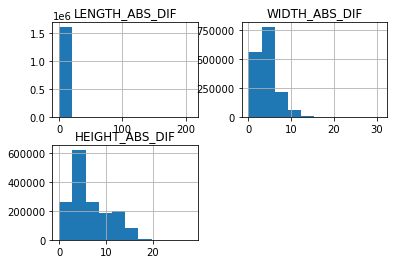

In [63]:
differences_df[['LENGTH_ABS_DIF', 'WIDTH_ABS_DIF', 'HEIGHT_ABS_DIF']].hist()